![New York City schoolbus]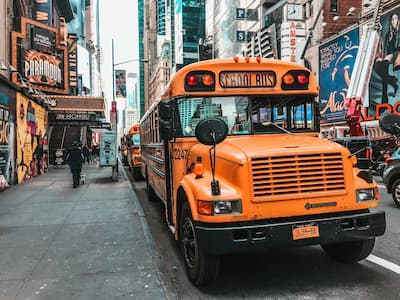

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

Project Description
Every year, school test results impact the college admissions fate of millions of students.

In this project, you will use standardized test performance data from NYC's public schools to identify the schools with top math results, look at how performance varies by borough, and find the city's top ten performing schools!

In [65]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import os
print(os.listdir(r"C:\Users\NEW USER\anaconda_projects"))

['amir_deals.csv', 'clean_books.csv', 'clean_unemployment.csv', 'countries-of-the-world.csv', 'db', 'divorce.csv', 'ds_salaries_clean.csv', 'employee_data.xlsx', 'food_consumption.csv', 'mpg.csv', 'netflix_data.csv', 'nobel.csv', 'planes.csv', 'PYTHON DATA ANALYSIS', 'schools.csv', 'student_alcohol_consumption.csv', 'world_happiness.csv', 'young-people-survey-responses.csv']


                                           school_name    borough  \
0    New Explorations into Science, Technology and ...  Manhattan   
1                                 Essex Street Academy  Manhattan   
2                         Lower Manhattan Arts Academy  Manhattan   
3      High School for Dual Language and Asian Studies  Manhattan   
4        Henry Street School for International Studies  Manhattan   
..                                                 ...        ...   
370  Queens High School for Information, Research, ...     Queens   
371  Rockaway Park High School for Environmental Su...     Queens   
372                   Channel View School for Research     Queens   
373                    Rockaway Collegiate High School     Queens   
374                                  Scholars' Academy     Queens   

    building_code  average_math  average_reading  average_writing  \
0            M022           657              601              601   
1            M445           395  

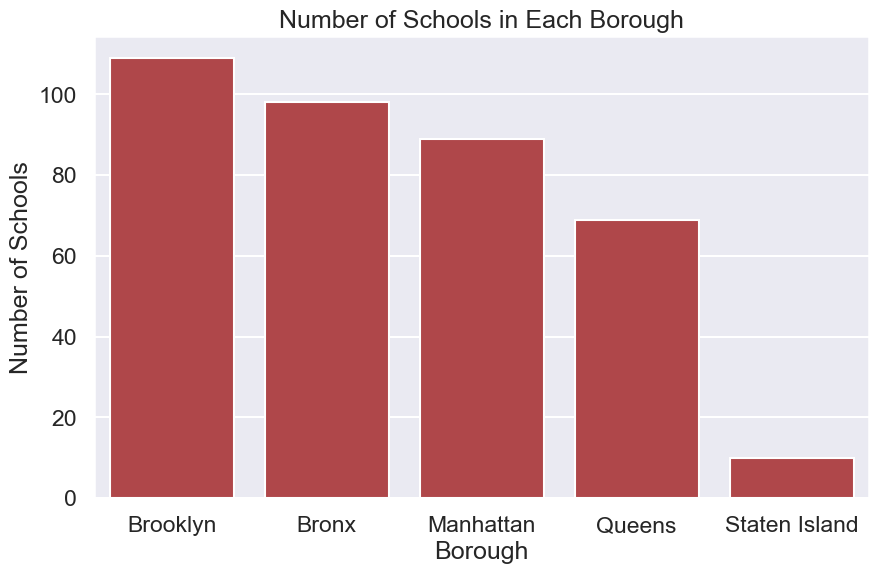

In [67]:
# Import DataFrame
school = pd.read_csv(r'C:\Users\NEW USER\anaconda_projects\schools.csv')
print(school)
# Getting to know my data
print(school.info())

# Gaining a quick understanding of data included in numerical columns 
print(school.describe())

# validating numerical columns
print(school.select_dtypes("number").head())

#Number of data points in each category
print(school[["borough"]].value_counts())

# Visualizing the number of schools in each borough
plt.figure(figsize=(10,6))
sns.set_palette("RdBu")
sns.set_style("darkgrid")
sns.set_context("talk")
cat_order=["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten Island"]
sns.countplot(data=school, x="borough", order=cat_order)
plt.title("Number of Schools in Each Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.show()


#### Dealing with missing values

In [68]:
#checking for missing values
print(school.isna().sum())

# Threshold of missing values
threshold = len(school) * 0.5
print(threshold)

# Using Boolean indexing to filter for columns with missing values less than or equal to this threshold
cols_to_drop = school.columns[school.isna().sum() <= threshold]
print(cols_to_drop)

# Imputing median percent tested by boroug (imputing by subgroup)
school_dict = school.groupby("borough")["percent_tested"].median().to_dict()
print(school_dict)
school["percent_tested"] = school["percent_tested"].fillna(school["borough"].map(school_dict))
print(school.isna().sum())

# Previewing categorical columns
print(school.select_dtypes("object").head())

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64
187.5
Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested'],
      dtype='object')
{'Bronx': 57.9, 'Brooklyn': 61.7, 'Manhattan': 72.0, 'Queens': 72.3, 'Staten Island': 64.2}
school_name        0
borough            0
building_code      0
average_math       0
average_reading    0
average_writing    0
percent_tested     0
dtype: int64
                                         school_name    borough building_code
0  New Explorations into Science, Technology and ...  Manhattan          M022
1                               Essex Street Academy  Manhattan          M445
2                       Lower Manhattan Arts Academy  Manhattan          M445
3    High School for Dual Language and Asian Studies  Manhattan          M445
4      Henry Street School for In

In [69]:
print(school["average_math"].max())
print(school["average_reading"].max())
print(school["average_writing"].max())

print(school["average_math"].min())
print(school["average_reading"].min())
print(school["average_writing"].min())

754
697
693
317
302
284


## Which NYC schools have the best math results?

                                           school_name  average_math
0    New Explorations into Science, Technology and ...           657
1                                 Essex Street Academy           395
2                         Lower Manhattan Arts Academy           418
3      High School for Dual Language and Asian Studies           613
4        Henry Street School for International Studies           410
..                                                 ...           ...
370  Queens High School for Information, Research, ...           372
371  Rockaway Park High School for Environmental Su...           357
372                   Channel View School for Research           427
373                    Rockaway Collegiate High School           399
374                                  Scholars' Academy           588

[375 rows x 2 columns]
                                           school_name  average_math
88                              Stuyvesant High School           754
170       

C:\Users\NEW USER\AppData\Local\Temp\ipykernel_16908\3269842730.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_maths_score_sorted, x="school_name", y="average_math", palette="viridis")


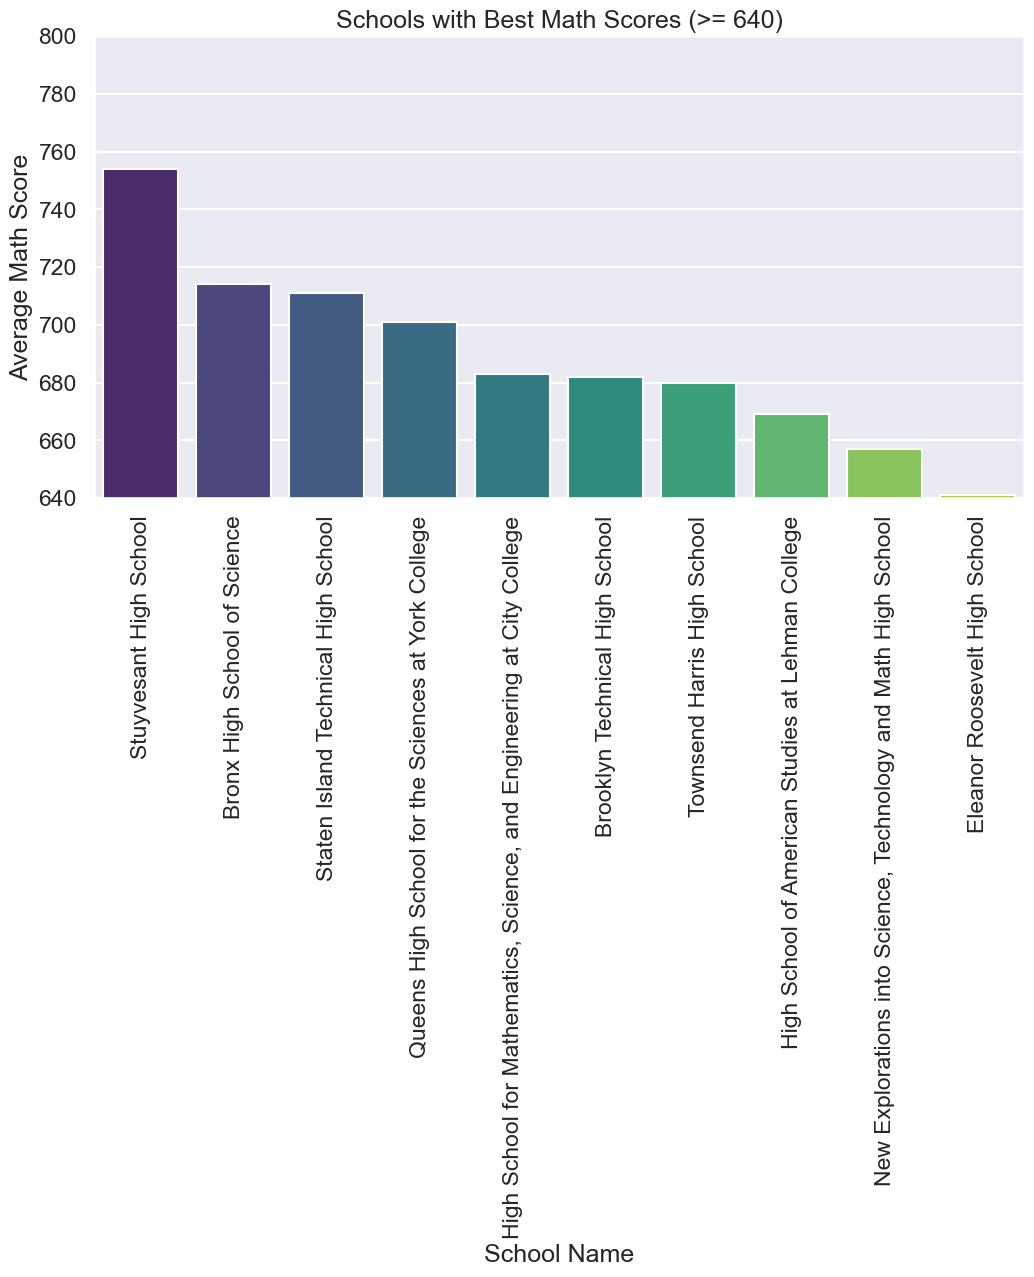

In [70]:
# The best math results are at least 80% of the *maximum possible score of 800* for math.
print(school[["school_name", "average_math"]])
best_maths_score = school[["school_name", "average_math"]][school["average_math"] >= 640]
# Sort the results by average_math in descending order
best_maths_score_sorted = best_maths_score.sort_values(by="average_math", ascending=False)

print(best_maths_score_sorted)

# Visualizing the best math scores
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.set_context("talk")
sns.barplot(data=best_maths_score_sorted, x="school_name", y="average_math", palette="viridis")
plt.title("Schools with Best Math Scores (>= 640)")
plt.xlabel("School Name")
plt.ylabel("Average Math Score")
plt.xticks(rotation=90)
plt.ylim(640, 800)
plt.show()

## What are the top 10 performing schools based on the combined SAT scores?

                                           school_name  total_SAT  \
88                              Stuyvesant High School       2144   
170                       Bronx High School of Science       2041   
93                 Staten Island Technical High School       2041   
174  High School of American Studies at Lehman College       2013   
333                        Townsend Harris High School       1981   
365  Queens High School for the Sciences at York Co...       1947   
5                       Bard High School Early College       1914   
280                     Brooklyn Technical High School       1896   
45                       Eleanor Roosevelt High School       1889   
68   High School for Mathematics, Science, and Engi...       1889   

           borough  
88       Manhattan  
170          Bronx  
93   Staten Island  
174          Bronx  
333         Queens  
365         Queens  
5        Manhattan  
280       Brooklyn  
45       Manhattan  
68       Manhattan  


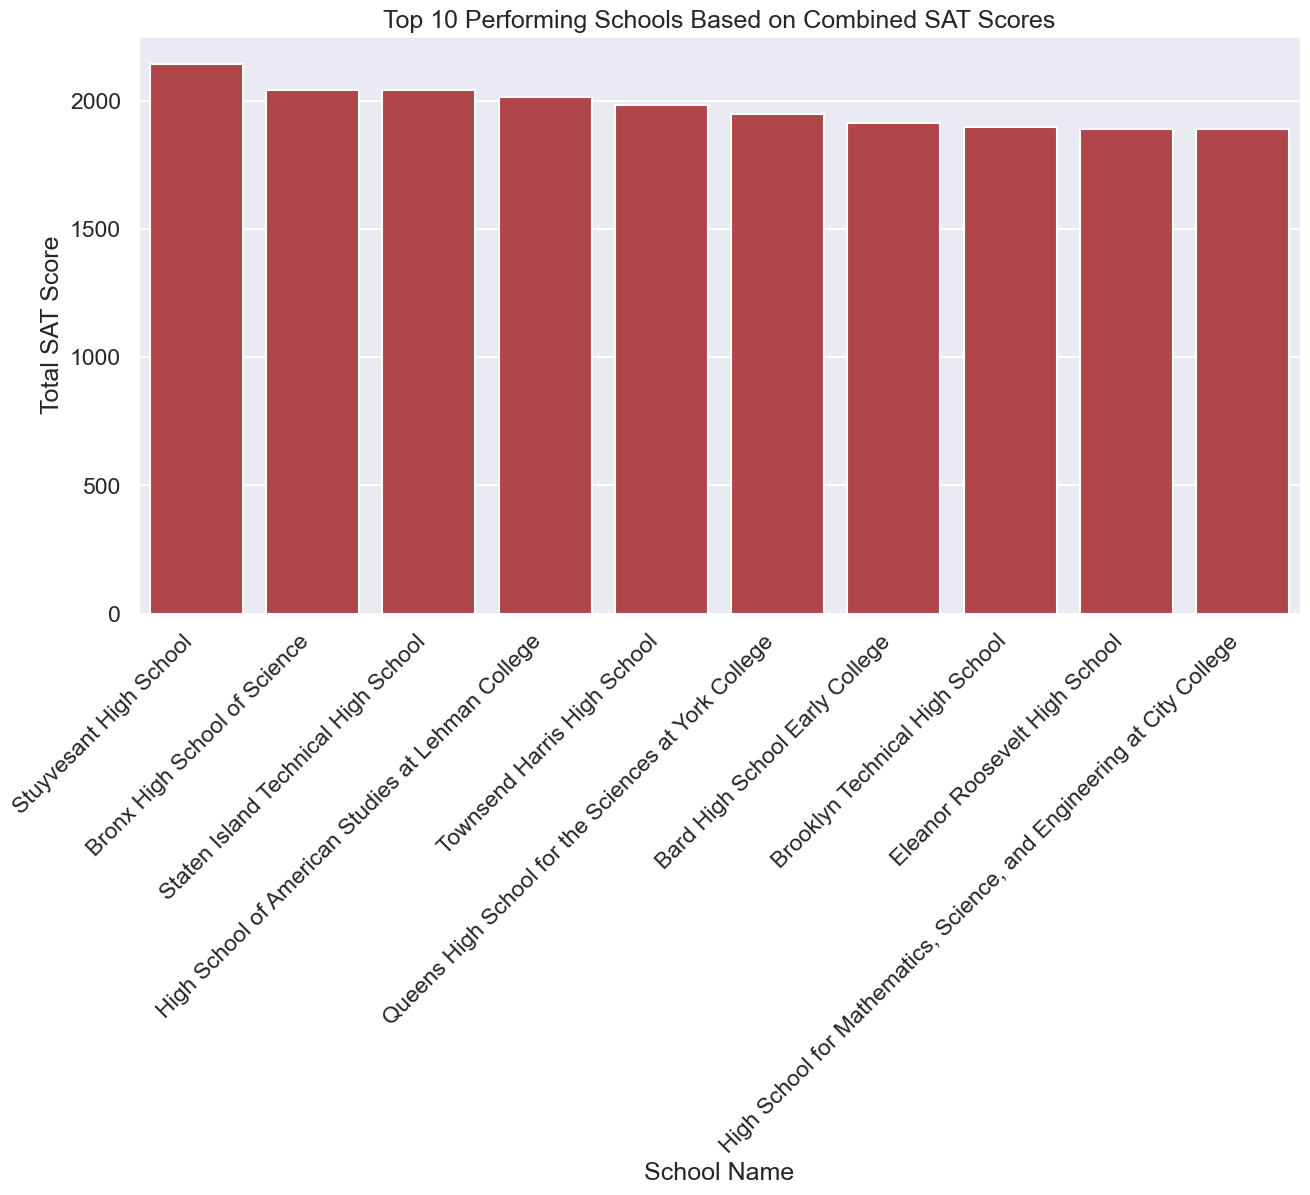

In [71]:
# Caculate Top 10 performing schools based on the combined SAT scores
school["total_SAT"] = school[["average_math", "average_reading", "average_writing"]].sum(axis=1)
# Select school_name and total_SAT, then sort and get top 10
schools = school[['school_name', 'total_SAT', 'borough']].sort_values("total_SAT", ascending=False)
print(schools.head(10))

# Visualizing the top 10 performing schools based on the combined SAT scores
plt.figure(figsize=(15,7.5))
sns.set_context("talk")
sns.barplot(data=schools.head(10), x="school_name", y="total_SAT")
plt.title("Top 10 Performing Schools Based on Combined SAT Scores")
plt.xlabel("School Name")
plt.ylabel("Total SAT Score")
plt.xticks(rotation=45, ha='right')
plt.show()

## Which single borough has the largest standard deviation in the combined SAT score?

borough
Staten Island    1439.000000
Queens           1345.478261
Manhattan        1340.134831
Brooklyn         1230.256881
Bronx            1202.724490
Name: total_SAT, dtype: float64


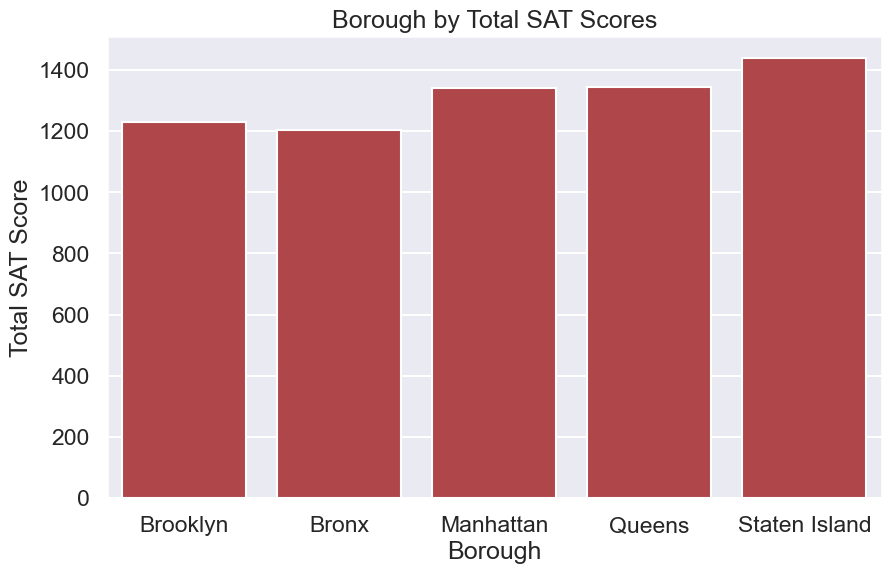

         borough  num_schools  average_SAT     std_SAT
0          Bronx           98  1202.724490  150.393901
1       Brooklyn          109  1230.256881  154.868427
2      Manhattan           89  1340.134831  230.294140
3         Queens           69  1345.478261  195.252899
4  Staten Island           10  1439.000000  222.303596
     borough  num_schools  average_SAT  std_SAT
2  Manhattan           89      1340.13   230.29


C:\Users\NEW USER\AppData\Local\Temp\ipykernel_16908\2053040132.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=borough_stats, x="borough", y="std_SAT", palette="magma", order=cat_order)


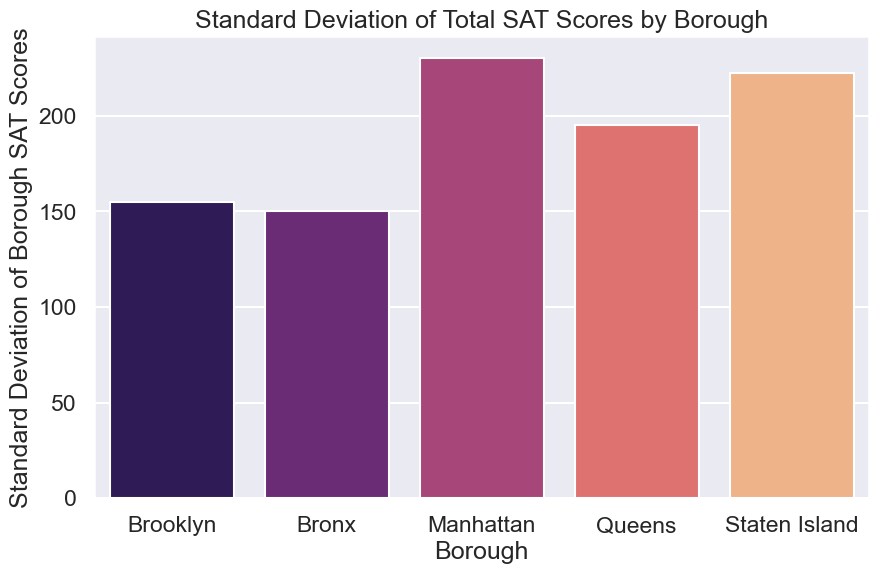

In [74]:
# The mean of borough by total SAT scores
print(school.groupby("borough")["total_SAT"].mean().sort_values(ascending=False))

# Visualizing the mean of borough by total SAT scores
plt.figure(figsize=(10,6))
sns.barplot(data=school, x="borough", y="total_SAT", errorbar=None, order=cat_order)
plt.title("Borough by Total SAT Scores")
plt.xlabel("Borough")
plt.ylabel("Total SAT Score")
plt.show()
 
 # Group the data by borough and calculate count, mean, and standard deviation
borough_stats = school.groupby("borough")["total_SAT"].agg(
    num_schools="count",
    average_SAT="mean",
    std_SAT="std"
).reset_index()
print(borough_stats)
# Round numeric values to two decimals
borough_stats["average_SAT"] = borough_stats["average_SAT"].round(2)
borough_stats["std_SAT"] = borough_stats["std_SAT"].round(2)

# Select the borough with the largest standard deviation
largest_std_dev = borough_stats.loc[borough_stats["std_SAT"].idxmax()]

# Convert it into a one-row DataFrame
largest_std_dev = pd.DataFrame([largest_std_dev])

print(largest_std_dev)


# Visualizing the standard deviation of total SAT scores by borough
plt.figure(figsize=(10,6))
sns.barplot(data=borough_stats, x="borough", y="std_SAT", palette="magma", order=cat_order)
plt.title("Standard Deviation of Total SAT Scores by Borough")
plt.xlabel("Borough")
plt.ylabel("Standard Deviation of Borough SAT Scores")
plt.show()